In [65]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
df = pd.read_csv("listings.csv")

In [67]:
df = df[["id", "name", "neighbourhood", "zipcode", "latitude", "longitude", "is_location_exact", "property_type", 
           "bedrooms", "bathrooms", "price", "number_of_reviews", "first_review", "last_review"]]
df.head()


,id,name,neighbourhood,zipcode,latitude,longitude,is_location_exact,property_type,bedrooms,bathrooms,price,number_of_reviews,first_review,last_review
0,5570,Ocean front condo on the sand,Mission Beach,92109,32.78430,-117.25258,t,Condominium,2.0,1.0,"$2,050.00",0,NaN,NaN
1,8488,Juniper Zen Palace- SD's Best Hood!,South Park,92104,32.72839,-117.12824,t,House,3.0,2.0,$225.00,43,2010-10-13,2020-02-04
2,29967,"Great home, 10 min walk to Beach",Pacific Beach,92109,32.80724,-117.25630,t,Bungalow,2.0,2.0,$225.00,60,2010-07-09,2018-08-09
3,38245,Point Loma: Den downstairs,Loma Portal,92106,32.74202,-117.21870,t,House,1.0,1.0,$75.00,143,2010-09-09,2019-10-20
4,39516,Art Studio Retreat/Rustic Cabin,North Park,92104,32.73188,-117.11918,t,Tiny house,1.0,1.0,$74.00,394,2010-07-20,2020-02-12


In [68]:
df_zillow = pd.read_csv("City_Zhvi_AllHomesV2.csv")


In [69]:
df_zillow = df_zillow[ df_zillow['CountyName'] == 'San Diego County' ]
df_zillow

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
8,54296,San Diego,CA,San Diego-Carlsbad,San Diego County,9,187796.0,187478.0,187235.0,186975.0,...,626283,628519,630429,632456,634223,636446,638247,641719,646089,652175
95,51405,Chula Vista,CA,San Diego-Carlsbad,San Diego County,96,171685.0,171577.0,171423.0,171225.0,...,528246,530361,532205,534134,535694,537697,539463,542819,546763,552215
135,6285,Oceanside,CA,San Diego-Carlsbad,San Diego County,136,153016.0,152951.0,152778.0,152540.0,...,528046,530118,531949,533462,534851,536621,538340,541360,544973,550171
166,11337,Escondido,CA,San Diego-Carlsbad,San Diego County,167,170699.0,170432.0,170209.0,170006.0,...,520575,521930,523415,524655,526060,527445,528842,531347,534648,539482
185,38333,El Cajon,CA,San Diego-Carlsbad,San Diego County,186,175247.0,175015.0,174834.0,174684.0,...,508665,510215,511938,513937,515667,517354,518727,521396,524729,529368
306,41517,Vista,CA,San Diego-Carlsbad,San Diego County,307,159312.0,159123.0,158934.0,158837.0,...,532233,534314,535875,537133,538193,539567,540914,543683,547103,551999
341,3975,Carlsbad,CA,San Diego-Carlsbad,San Diego County,342,255327.0,255354.0,255356.0,255252.0,...,841288,843719,845114,847498,850092,853205,855103,858968,864092,871347
469,40737,San Marcos,CA,San Diego-Carlsbad,San Diego County,470,178977.0,178771.0,178580.0,178500.0,...,581555,583066,584352,585382,586381,587594,588900,591532,594625,598731
614,41025,Spring Valley,CA,San Diego-Carlsbad,San Diego County,615,152275.0,152340.0,152340.0,152389.0,...,474306,476476,478676,480527,482041,483609,485671,489031,493430,498728
644,46089,La Mesa,CA,San Diego-Carlsbad,San Diego County,645,170821.0,170740.0,170835.0,171071.0,...,553743,555290,556998,559375,561656,563991,565359,568021,571712,577092


In [70]:
columns = df_zillow.columns.to_numpy()

for col in columns:
    year = col[0:4]
    if year < '2007':
        df_zillow = df_zillow.drop( columns = col, axis = 1)
df_zillow = df_zillow.drop( columns = ['RegionID', 'Metro', 'CountyName', 'State'], axis = 1)      

In [71]:
df_zillow = df_zillow.reset_index()
df_zillow = df_zillow.drop( columns = 'index', axis = 1 )
df_zillow

,RegionName,SizeRank,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,San Diego,9,543915.0,541046.0,535320.0,529617.0,523063.0,519796.0,515688.0,513537.0,...,626283,628519,630429,632456,634223,636446,638247,641719,646089,652175
1,Chula Vista,96,518938.0,516426.0,510813.0,505354.0,499201.0,495387.0,490566.0,486877.0,...,528246,530361,532205,534134,535694,537697,539463,542819,546763,552215
2,Oceanside,136,504616.0,501869.0,496288.0,490329.0,483440.0,479842.0,475687.0,473354.0,...,528046,530118,531949,533462,534851,536621,538340,541360,544973,550171
3,Escondido,167,528017.0,525582.0,520034.0,513991.0,506897.0,502937.0,498004.0,494726.0,...,520575,521930,523415,524655,526060,527445,528842,531347,534648,539482
4,El Cajon,186,513510.0,510186.0,504180.0,498411.0,492132.0,489002.0,485369.0,483013.0,...,508665,510215,511938,513937,515667,517354,518727,521396,524729,529368
5,Vista,307,516318.0,513688.0,508018.0,502152.0,495525.0,492273.0,488581.0,486781.0,...,532233,534314,535875,537133,538193,539567,540914,543683,547103,551999
6,Carlsbad,342,704645.0,702096.0,695691.0,689181.0,681789.0,678776.0,675357.0,674474.0,...,841288,843719,845114,847498,850092,853205,855103,858968,864092,871347
7,San Marcos,470,545750.0,542694.0,536421.0,529641.0,522302.0,518809.0,515286.0,513942.0,...,581555,583066,584352,585382,586381,587594,588900,591532,594625,598731
8,Spring Valley,615,476229.0,474108.0,469516.0,465143.0,460156.0,457841.0,454660.0,452287.0,...,474306,476476,478676,480527,482041,483609,485671,489031,493430,498728
9,La Mesa,645,481025.0,478355.0,473058.0,468002.0,462321.0,458660.0,454086.0,450767.0,...,553743,555290,556998,559375,561656,563991,565359,568021,571712,577092


In [98]:
df_zillow_rent = pd.read_csv("City_Zri_AllHomesPlusMultifamily.csv")
df_zillow_rent = df_zillow_rent[df_zillow_rent['CountyName'] == 'San Diego County' ]
df_zillow_rent = df_zillow_rent.drop(columns = ['RegionID', 'Metro', 'CountyName', 'State',], axis = 1)
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,2:6], axis = 1)
for i in range(3, 20):
    df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,i:i+5], axis = 1)
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,18:], axis = 1)
df_zillow_rent = df_zillow_rent.drop(columns = ['SizeRank'])
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,San Diego,2035.0,2003.0,2004.0,1990.0,2006.0,2050.0,2105.0,2119.0,2216.0,2275.0,2322.0,2371.0,2379.0,2423.0,2416.0,2463.0
1,Chula Vista,1974.0,1879.0,1872.0,1859.0,1872.0,1907.0,1947.0,1951.0,2015.0,2103.0,2144.0,2195.0,2200.0,2246.0,2271.0,2302.0
2,Oceanside,1764.0,1772.0,1793.0,1752.0,1786.0,1812.0,1852.0,1877.0,1955.0,1984.0,2023.0,2097.0,2146.0,2176.0,2189.0,2243.0
3,Escondido,1711.0,1619.0,1632.0,1618.0,1655.0,1678.0,1752.0,1767.0,1837.0,1902.0,1968.0,2013.0,2036.0,2087.0,2094.0,2135.0
4,El Cajon,1736.0,1707.0,1724.0,1717.0,1737.0,1755.0,1816.0,1824.0,1874.0,1954.0,2000.0,2066.0,2067.0,2106.0,2152.0,2188.0
5,Vista,1814.0,1766.0,1775.0,1752.0,1775.0,1801.0,1844.0,1851.0,1932.0,2009.0,2088.0,2150.0,2130.0,2205.0,2200.0,2264.0
6,Carlsbad,2309.0,2267.0,2210.0,2194.0,2206.0,2312.0,2401.0,2466.0,2575.0,2613.0,2621.0,2686.0,2705.0,2759.0,2761.0,2768.0
7,San Marcos,2023.0,1976.0,1988.0,1977.0,2005.0,2051.0,2121.0,2150.0,2239.0,2294.0,2325.0,2377.0,2387.0,2453.0,2444.0,2451.0
8,Spring Valley,1765.0,1690.0,1740.0,1745.0,1765.0,1793.0,1821.0,1831.0,1873.0,1954.0,1994.0,2050.0,2054.0,2088.0,2110.0,2163.0
9,La Mesa,1834.0,1808.0,1817.0,1809.0,1808.0,1844.0,1882.0,1874.0,1934.0,2008.0,2054.0,2100.0,2113.0,2161.0,2177.0,2230.0


San Diego


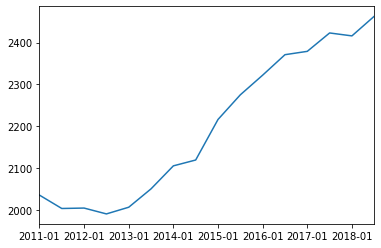

Chula Vista


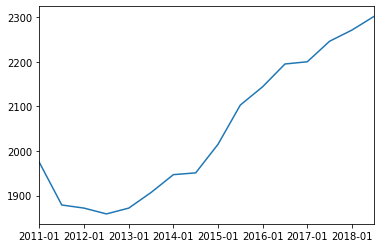

Oceanside


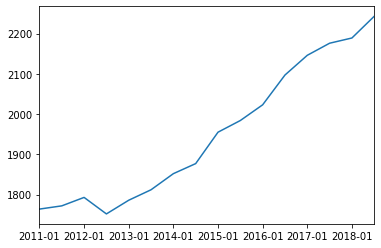

Escondido


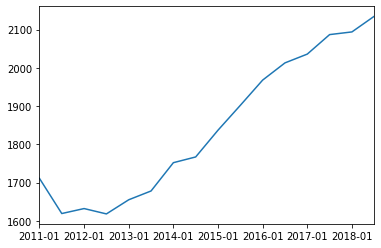

El Cajon


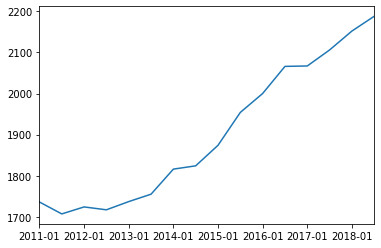

Vista


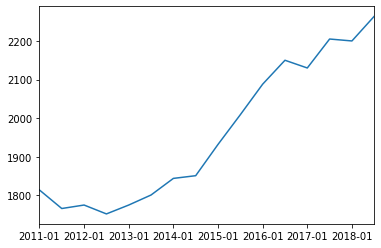

Carlsbad


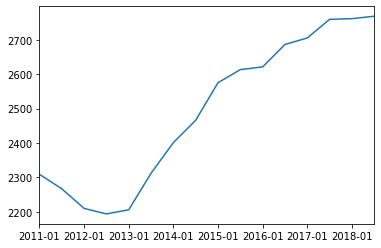

San Marcos


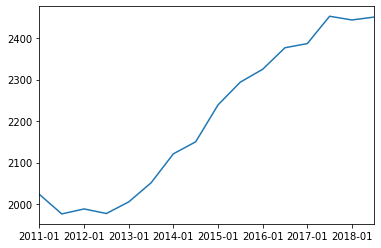

Spring Valley


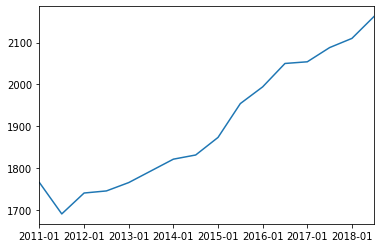

La Mesa


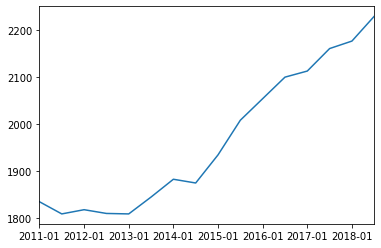

Encinitas


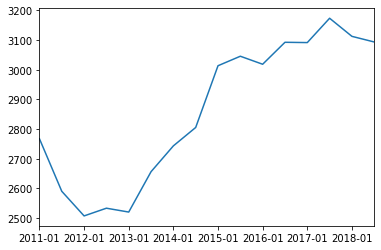

National City


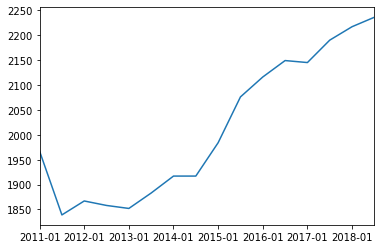

Santee


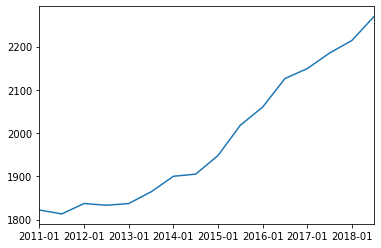

Poway


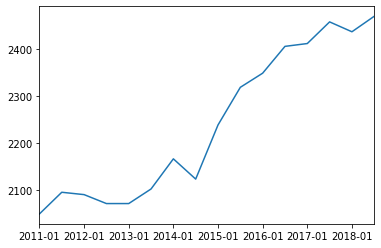

Fallbrook


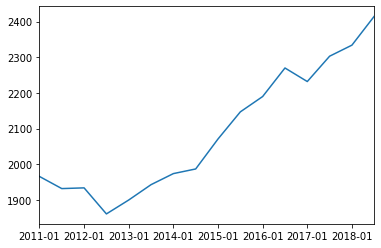

Lakeside


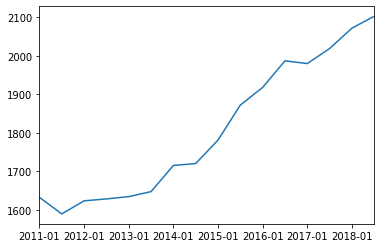

Ramona


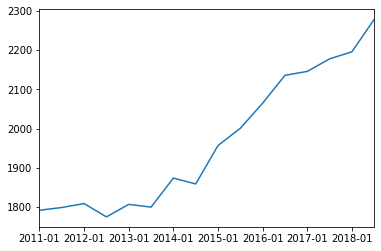

Imperial Beach


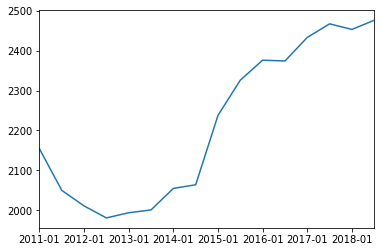

Lemon Grove


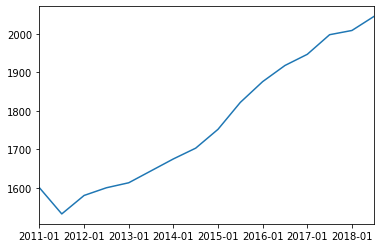

Coronado


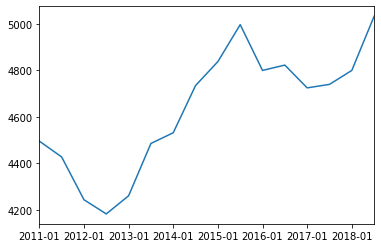

Valley Center


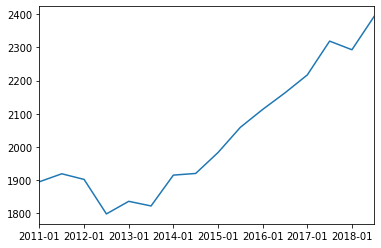

Alpine


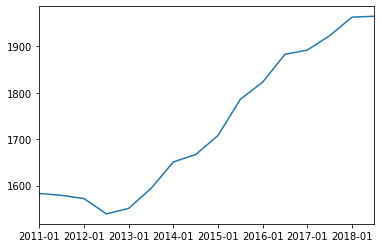

Bonita


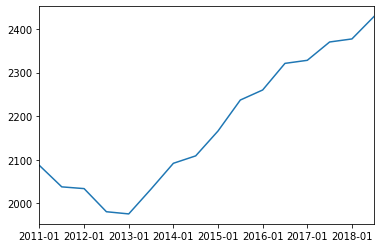

Solana Beach


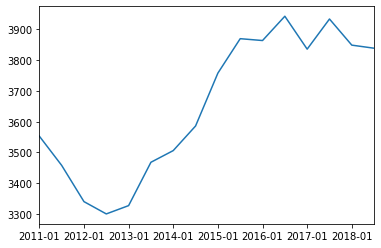

Rancho Santa Fe


In [ ]:
for i in range(0, 30):
    city = df_zillow_rent.loc[i, :].squeeze()
    print(city[0])
    city.iloc[1:].plot()
    plt.show()